In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
path = '../data/raw/train.csv'

In [117]:
df = pd.read_csv(path, index_col='PassengerId')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Dead & survivors

In [118]:
survived = df.Survived.value_counts()
survived

Survived
0    549
1    342
Name: count, dtype: int64

The zero (0) value means false, and the one (1) values means true. That is refering as true = alive, false = dead. 
* 549 deaths
* 42 survivors

### Pepople who paid more (anomalies)

In [119]:
q1 = df.Fare.quantile(0.25)
q3 = df.Fare.quantile(0.75)
iqr = q3 - q1
fx_low = q1 - 1.5*iqr
fx_upp = q3 + 1.5*iqr

In [120]:
atp_fare = (df["Fare"] > (q3 + 1.5*iqr))
val_atp = df.Fare.loc[atp_fare]
len(val_atp)

116

There are 116 atypical values at the fare column, meaning that this amount of people paid more.

### Median, mean & mode

In [121]:
mean = df.Fare.mean()
median = df.Fare.median()
mode = df.Fare.mode()

In [122]:
mean

32.204207968574636

In [123]:
median

14.4542

In [124]:
mode

0    8.05
Name: Fare, dtype: float64

The measures of central tendecy of the prices are:
* mean = 32.2042
* mode = 8.05
* median = 14.4542

### Peoples age variance

In [125]:
var_age = df.Age.var()
var_age

211.0191247463081

In [126]:
np.sqrt(var_age)

14.526497332334044

The variance is 211.0191 and the standard deviation  14.5264

### Probability of survivance

In [127]:
women = ((df.Age == 40.0)) & ((df.Sex == 'female')) & ((df.Survived == 1))
men = ((df.Age == 70.0)) & ((df.Sex == 'male')) & ((df.Survived == 1))
quant_w = len(df.loc[women])
quant_m = len(df.loc[men])
prob_w = round((quant_w/len(df))*100, 2)
prob_m = round((quant_m/len(df))*100, 2)

if prob_m > prob_w:
    print('Its more likely for a 70 year old man to survive, with a ', prob_m, '% probability of surviving')
else:
   print('Its more likely for a 40 year old woman to survive, with a ', prob_w, '% probability of surviving') 
   print('The probability of a 70 year old man of surviving is: ', prob_m)

Its more likely for a 40 year old woman to survive, with a  0.56 % probability of surviving
The probability of a 70 year old man of surviving is:  0.0


### Passengers age distribution

In [128]:
surv_no = df[(df['Survived'] == 0)]
surv_no.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


<Axes: >

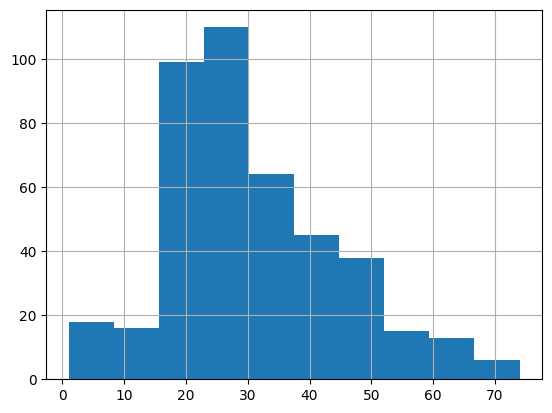

In [129]:
surv_no['Age'].hist(bins=10)

In [130]:
surv_no['Age'].describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

In [131]:
surv_no['Age'].mode()

0    21.0
Name: Age, dtype: float64

In [132]:
surv_nm = surv_no['Age'] < 10
surv_nm.sum()

24

In [133]:
surv_yes = df[df['Survived'] == 1]
surv_yes.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


<Axes: >

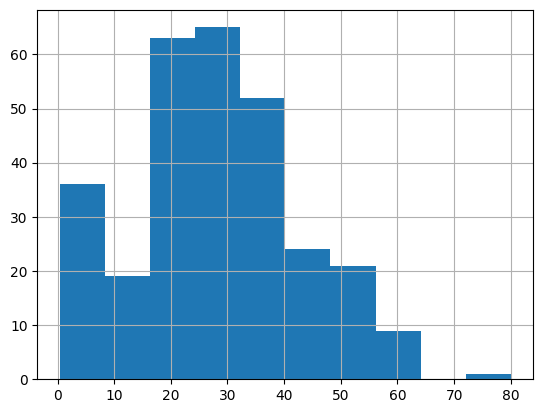

In [134]:
surv_yes['Age'].hist(bins=10)

In [135]:
surv_yes['Age'].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [136]:
surv_yes['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [137]:
surv_yes['Age'].mode()
surv_ym = surv_yes['Age'] <10
surv_ym.sum()


38

What we can rescue from the analysis is that younger people (2-10) are more likely to survive. Only one 80 year old survived and the youngest to die wa 1 year old.

The mode was 24, meaning that 24 year old people survived the most.

### Sex distribution

#### Dead

<Axes: >

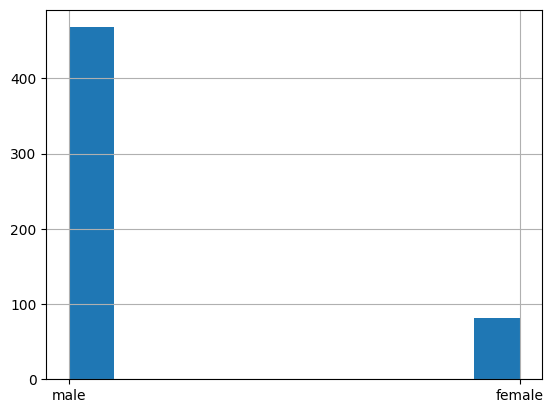

In [138]:
surv_no.Sex.hist()

In [139]:
men_nosurv = surv_no['Sex'] == 'male'
woman_nosurv = surv_no['Sex'] == 'female'
print(f'From the deceased {men_nosurv.sum()} were men & {woman_nosurv.sum()} were woman')
print(f'The {(men_nosurv.sum()/len(surv_no))*100:.2f}% of the people that didnt survived were men & {woman_nosurv.sum()/len(surv_no)*100:.2f}% were woman')

From the deceased 468 were men & 81 were woman
The 85.25% of the people that didnt survived were men & 14.75% were woman


#### Survived

<Axes: >

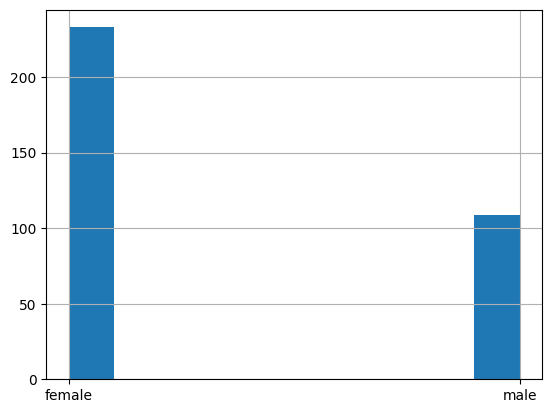

In [140]:
surv_yes['Sex'].hist()

In [141]:
men_ysurv = surv_yes['Sex'] == 'male'
woman_ysurv = surv_yes['Sex'] == 'female'
print(f'From the survivors {men_ysurv.sum()} were men & {woman_ysurv.sum()} were woman')
print(f'The {(men_ysurv.sum()/len(surv_yes))*100:.2f}% from the survivors were men & {woman_ysurv.sum()/len(surv_yes)*100:.2f}% were woman')

From the survivors 109 were men & 233 were woman
The 31.87% from the survivors were men & 68.13% were woman
